In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
pd.options.display.max_seq_items = 2000

In [3]:
check = pd.read_csv('train_data.csv')
df = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_features.csv')
MM = MinMaxScaler()

df = pd.concat([df, df_test], sort=False)
df = df.set_index(['name'])
df.drop(['email_address'], axis = 1,inplace = True)
df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
name,,,,,,,,,,,,,,,,,,,,
RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
SHELBY REX,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [4]:
#Replace NaNs
fin_features = ['salary', 'deferral_payments', 'total_payments', \
                'loan_advances', 'bonus', 'restricted_stock_deferred', \
                'deferred_income', 'total_stock_value', 'expenses', \
                'exercised_stock_options', 'other', 'long_term_incentive', \
                'restricted_stock', 'director_fees']

email_features = ['to_messages', 'from_poi_to_this_person', \
                  'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

In [5]:
for i in fin_features:
    df[i] = df[i].fillna(0)
for i in email_features:
    df[i] = df[i].fillna(df[i].median())

In [6]:
for i in df.columns:
    if df[i].dtype =='float64':
        df[i] = MM.fit_transform(df[i].values.reshape(-1,1))

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bonus,146.0,0.013699,0.083149,0.0,0.000000,0.003082,0.008218,1.0
deferral_payments,146.0,0.016818,0.085172,0.0,0.003185,0.003185,0.003486,1.0
deferred_income,146.0,0.986326,0.084959,0.0,0.998645,1.000000,1.000000,1.0
director_fees,146.0,0.013888,0.085129,0.0,0.000000,0.000000,0.000000,1.0
exercised_stock_options,146.0,0.013416,0.083622,0.0,0.000000,0.001951,0.005498,1.0
expenses,146.0,0.013514,0.082655,0.0,0.000000,0.003855,0.010265,1.0
from_messages,146.0,0.025317,0.100110,0.0,0.001672,0.002020,0.002734,1.0
from_poi_to_this_person,146.0,0.099639,0.129187,0.0,0.048769,0.066288,0.077178,1.0
from_this_person_to_poi,146.0,0.045280,0.128665,0.0,0.009852,0.013136,0.022578,1.0
loan_advances,146.0,0.013699,0.114976,0.0,0.000000,0.000000,0.000000,1.0


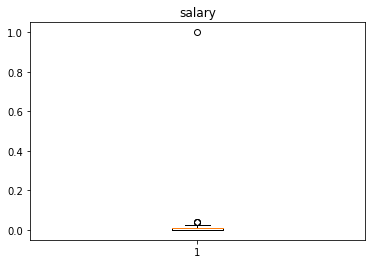

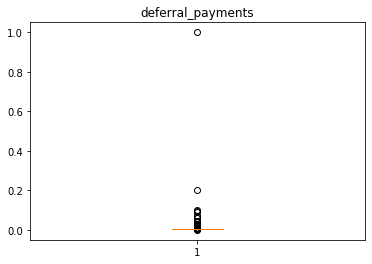

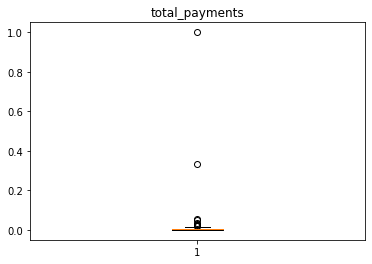

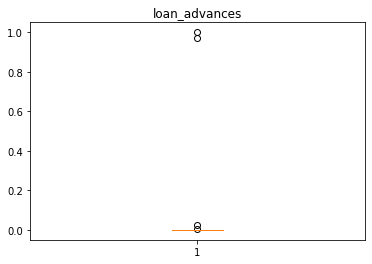

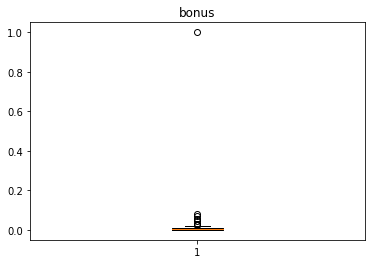

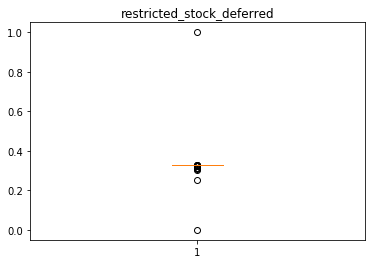

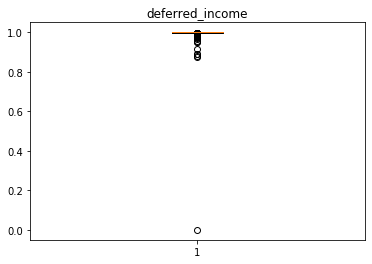

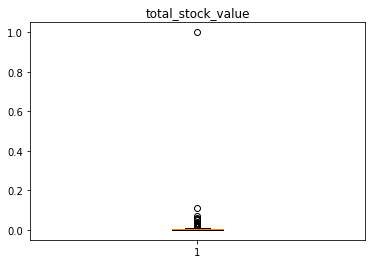

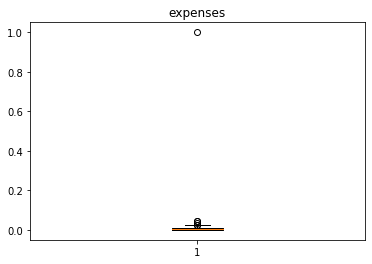

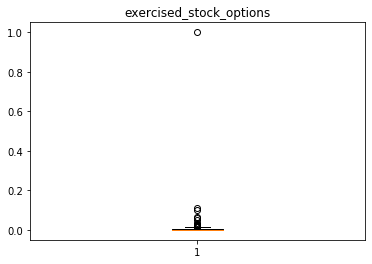

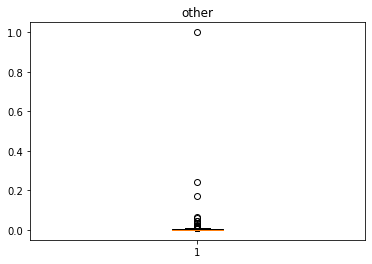

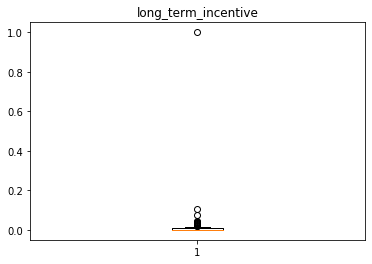

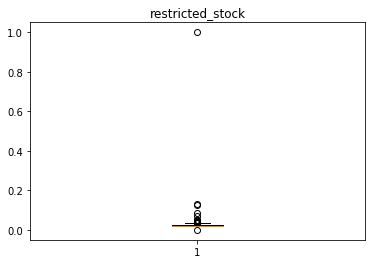

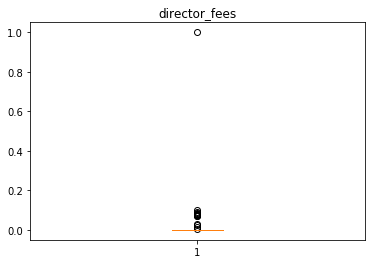

In [8]:
#looking for outliers
for col in fin_features:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [9]:
print(df.index)

Index(['RICE KENNETH D', 'SKILLING JEFFREY K', 'SHELBY REX',
       'KOPPER MICHAEL J', 'CALGER CHRISTOPHER F', 'HIRKO JOSEPH',
       'YEAGER F SCOTT', 'COLWELL WESLEY', 'LAY KENNETH L', 'GLISAN JR BEN F',
       'KOENIG MARK E', 'RIEKER PAULA H', 'FASTOW ANDREW S', 'GOLD JOSEPH',
       'ALLEN PHILLIP K', 'BLACHMAN JEREMY M', 'GAHN ROBERT S', 'WROBEL BRUCE',
       'CUMBERLAND MICHAEL S', 'LEFF DANIEL P', 'THORN TERENCE H',
       'OVERDYKE JR JERE C', 'BUCHANAN HAROLD G', 'MCDONALD REBECCA',
       'CORDES WILLIAM R', 'GATHMANN WILLIAM D', 'KITCHEN LOUISE',
       'POWERS WILLIAM', 'DODSON KEITH', 'KAMINSKI WINCENTY J',
       'WHALEY DAVID A', 'BERGSIEKER RICHARD P', 'DURAN WILLIAM D',
       'LAVORATO JOHN J', 'DEFFNER JOSEPH M', 'URQUHART JOHN A',
       'DIETRICH JANET R', 'REDMOND BRIAN L', 'PEREIRA PAULO V. FERRAZ',
       'HAYSLETT RODERICK J', 'BAZELIDES PHILIP J', 'LEMAISTRE CHARLES',
       'MARTIN AMANDA K', 'FOY JOE', 'GRAY RODNEY', 'ELLIOTT STEVEN',
       'BUTTS ROBERT

In [10]:
#del first outlier
df = df.drop(['TOTAL'], axis = 0)
# second outlier (LAY KENNETH L) is a poi, so not removing
# 'The Travel Agency in the Park' is not a official employee
df = df.drop(['THE TRAVEL AGENCY IN THE PARK'], axis = 0)

In [11]:
df.shape

(144, 20)

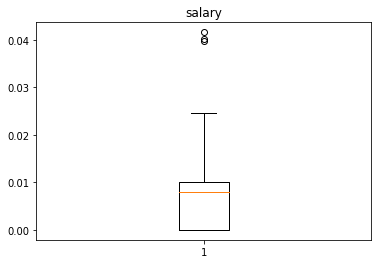

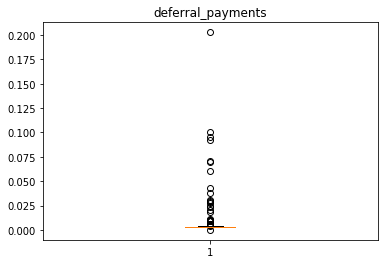

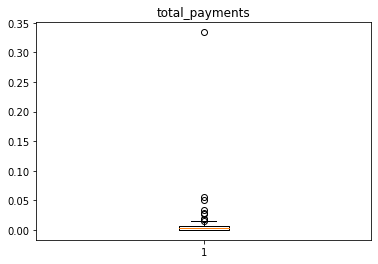

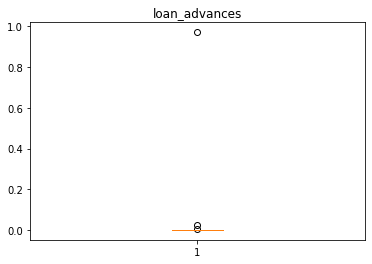

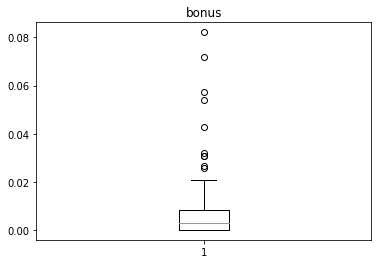

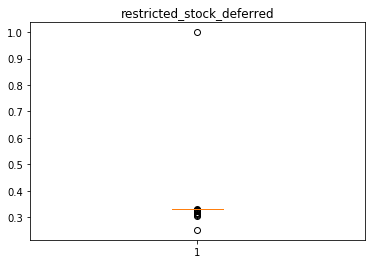

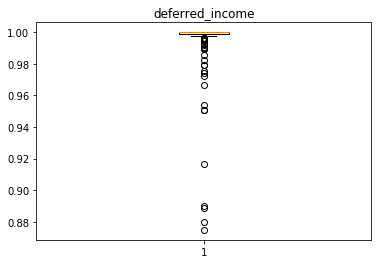

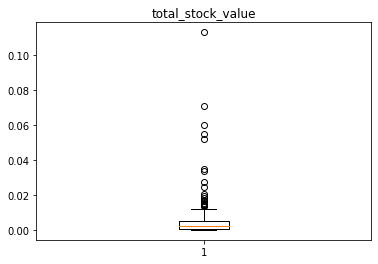

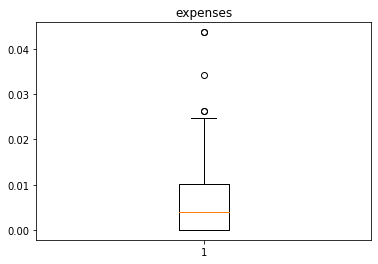

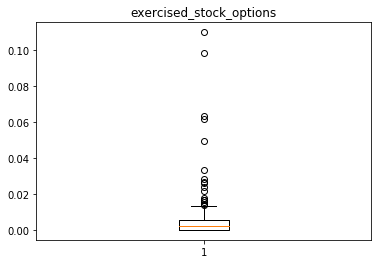

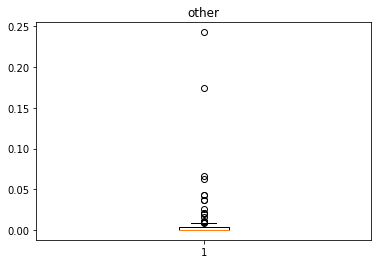

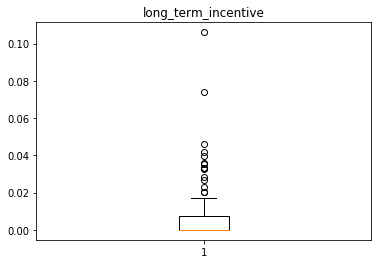

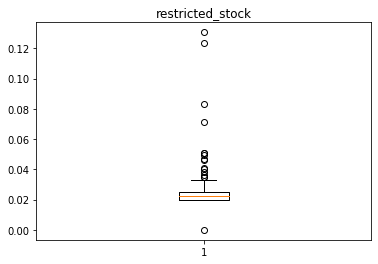

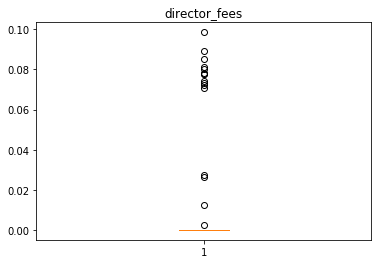

In [12]:
for col in fin_features:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [13]:
#feature engineering: emails relate to poi = (to_poi + from_poi)/(to_messages+from_messages)
df['Email_relate_to_poi'] = (df['from_poi_to_this_person']+df['from_this_person_to_poi'])/(df['to_messages']+df['from_messages'])
df.sort_values(['Email_relate_to_poi'], ascending = False)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,Email_relate_to_poi
name,,,,,,,,,,,,,,,,,,,,,
HUMPHREY GENE E,0.000000,0.095290,1.000000,0.000000,0.007322,0.000954,0.000348,0.018939,0.027915,0.0,...,0.000000,False,0.019593,0.328952,0.004895,0.021199,0.004704,0.010004,0.005355,9.272943
DONAHUE JR JEFFREY M,0.008218,0.003185,0.989283,0.000000,0.002457,0.018389,0.000697,0.356061,0.018062,0.0,...,0.000021,NaN,0.021964,0.328952,0.010433,0.139518,0.053538,0.002826,0.002589,6.898200
UMANOFF ADAM S,0.008103,0.003185,1.000000,0.000000,0.000000,0.010147,0.000418,0.022727,0.000000,0.0,...,0.000000,False,0.019593,0.328952,0.010807,0.007066,0.003578,0.003648,0.000101,5.687508
GARLAND C KEVIN,0.008732,0.003185,1.000000,0.000000,0.002041,0.009246,0.002229,0.018939,0.044335,0.0,...,0.001425,False,0.021549,0.328952,0.008686,0.031890,0.010072,0.005055,0.002164,5.144009
JACKSON CHARLENE R,0.002568,0.003185,1.000000,0.000000,0.000594,0.001945,0.003065,0.047348,0.031199,0.0,...,0.000057,False,0.023661,0.328952,0.010806,0.020837,0.013318,0.001779,0.001772,4.794363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POWERS WILLIAM,0.000000,0.003185,0.999375,0.012513,0.000000,0.000000,0.000975,0.000000,0.000000,0.0,...,0.000000,False,0.019593,0.328952,0.000000,0.001812,0.039491,0.000000,0.000101,0.000000
FOWLER PEGGY,0.000000,0.003185,1.000000,0.000000,0.004249,0.000000,0.001672,0.000000,0.000000,0.0,...,0.000000,False,0.023808,0.328952,0.000000,0.001450,0.030480,0.000000,0.004439,0.000000
GIBBS DANA R,0.000000,0.018863,1.000000,0.000000,0.007115,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,NaN,0.019593,0.328952,0.000000,0.003805,0.007421,0.003119,0.005206,0.000000


In [14]:
df_train = df[:111].drop(['poi'], axis = 1)
df_valid = df['poi'][:111].astype('bool')

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, RICE KENNETH D to HAUG DAVID L
Data columns (total 20 columns):
bonus                        111 non-null float64
deferral_payments            111 non-null float64
deferred_income              111 non-null float64
director_fees                111 non-null float64
exercised_stock_options      111 non-null float64
expenses                     111 non-null float64
from_messages                111 non-null float64
from_poi_to_this_person      111 non-null float64
from_this_person_to_poi      111 non-null float64
loan_advances                111 non-null float64
long_term_incentive          111 non-null float64
other                        111 non-null float64
restricted_stock             111 non-null float64
restricted_stock_deferred    111 non-null float64
salary                       111 non-null float64
shared_receipt_with_poi      111 non-null float64
to_messages                  111 non-null float64
total_payments              

In [16]:
X_train, X_valid, Y_train, Y_valid = train_test_split(df_train, df_valid, test_size = 0.25, random_state=42)

acc: 0.8214285714285714
precision: 0.5
recall: 0.2


<BarContainer object of 20 artists>

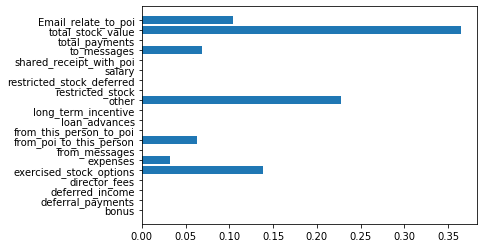

In [17]:
# try using Decision Tree to find feature importance
DT = DecisionTreeClassifier(max_depth = 5, random_state=42)
DT.fit(X_train, Y_train)
DT_pred = DT.predict(X_valid)

acc = accuracy_score(Y_valid, DT_pred)
precision = precision_score(Y_valid, DT_pred)
recall = recall_score(Y_valid, DT_pred)
print(  f'acc: {acc}\nprecision: {precision}\nrecall: {recall}')
plt.barh(df_train.columns, DT.feature_importances_)

In [18]:
DT_importance = pd.Series(DT.feature_importances_, index= df_train.columns)
print(DT_importance.nlargest(10))

total_stock_value          0.364376
other                      0.228101
exercised_stock_options    0.138333
Email_relate_to_poi        0.103750
to_messages                0.069167
from_poi_to_this_person    0.063610
expenses                   0.032662
bonus                      0.000000
deferral_payments          0.000000
deferred_income            0.000000
dtype: float64


acc: 0.8214285714285714
precision: 0.5
recall: 0.2


<BarContainer object of 20 artists>

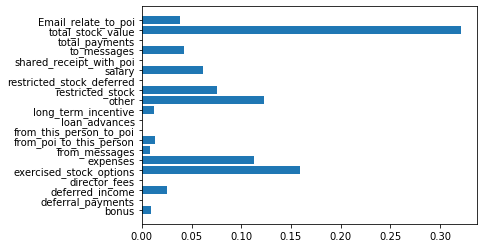

In [19]:
# try using Random Forest to find feature importance
RF = RandomForestClassifier(n_estimators= 10, max_depth= 5, max_features=10, random_state=42)
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_valid)

acc = accuracy_score(Y_valid, RF_pred)
precision = precision_score(Y_valid, RF_pred)
recall = recall_score(Y_valid, RF_pred)
print(  f'acc: {acc}\nprecision: {precision}\nrecall: {recall}')
plt.barh(df_train.columns, RF.feature_importances_)

In [20]:
RF_importance = pd.Series(RF.feature_importances_, index= df_train.columns)
print(RF_importance.nlargest(10).index)

Index(['total_stock_value', 'exercised_stock_options', 'other', 'expenses',
       'restricted_stock', 'salary', 'to_messages', 'Email_relate_to_poi',
       'deferred_income', 'from_poi_to_this_person'],
      dtype='object')


In [21]:
RF_importance.nlargest(10).index

Index(['total_stock_value', 'exercised_stock_options', 'other', 'expenses',
       'restricted_stock', 'salary', 'to_messages', 'Email_relate_to_poi',
       'deferred_income', 'from_poi_to_this_person'],
      dtype='object')

In [22]:
# SelectKBest


In [23]:
SK = SelectKBest(k = 10)
SK.fit(X_train, Y_train)
SK_importance = pd.Series(SK.scores_, index= df_train.columns)
print(SK_importance.nlargest(10))

exercised_stock_options    34.644671
total_stock_value          33.573993
salary                     18.595550
restricted_stock           16.637906
other                      13.067713
total_payments             12.257187
loan_advances              10.456110
bonus                       8.727621
expenses                    5.509104
long_term_incentive         5.069630
dtype: float64


In [24]:
importance = pd.concat([SK_importance, DT_importance, RF_importance], axis = 1)
importance.columns = ['SK', 'DT', 'RF']
importance

,SK,DT,RF
bonus,8.727621,0.000000,0.008749
deferral_payments,0.611991,0.000000,0.000000
deferred_income,0.142619,0.000000,0.025538
director_fees,0.918929,0.000000,0.000000
exercised_stock_options,34.644671,0.138333,0.158891
expenses,5.509104,0.032662,0.112672
from_messages,0.573688,0.000000,0.007801
from_poi_to_this_person,1.279985,0.063610,0.012906
from_this_person_to_poi,0.430132,0.000000,0.000000
loan_advances,10.456110,0.000000,0.000000


In [25]:
features = ['exercised_stock_options','total_stock_value','Email_relate_to_poi','other','expenses','deferred_income','bonus']

In [41]:
features2 = ['exercised_stock_options','total_stock_value','other','expenses']

In [26]:
len(features)

7

In [42]:
df_features = df[features2][:111]
df_target = df['poi'][:111].astype('bool')

In [43]:
train_X, valid_X, train_Y, valid_Y = train_test_split(df_features, df_target, test_size = 0.3, random_state = 4)

In [46]:
# model : KNN, RF, DT, NB  ,try without tuning
KNN = KNeighborsClassifier()
RF = RandomForestClassifier(random_state = 42)
DT = DecisionTreeClassifier(random_state = 42)
NB = GaussianNB()

models = [KNN, RF, DT, NB]
preds = []
accuracies=[]
precisions = []
recalls = []
F1s = []

for model in models:
    model.fit(train_X, train_Y)
    pred = model.predict(valid_X)
    preds.append(pred)
    accuracies.append(accuracy_score(valid_Y, pred))
    precisions.append(precision_score(valid_Y, pred))
    recalls.append(recall_score(valid_Y, pred))
    F1s.append(f1_score(valid_Y, pred))
    
lists = [models, accuracies, precisions, recalls, F1s]
result = pd.DataFrame(lists).transpose()
result

C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,0,1,2,3,4
0,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.911765,0.5,0.333333,0.4
1,"(DecisionTreeClassifier(class_weight=None, cri...",0.794118,0.166667,0.333333,0.222222
2,"DecisionTreeClassifier(class_weight=None, crit...",0.764706,0.222222,0.666667,0.333333
3,"GaussianNB(priors=None, var_smoothing=1e-09)",0.852941,0.25,0.333333,0.285714


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [50]:
RF = RandomForestClassifier(random_state = 42)

In [51]:
parameters = {'n_estimators': [3,4,5,6,7,8,9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,3,4,5,6,7,8], 
             }

recall_scorer = make_scorer(recall_score)

grid_obj = GridSearchCV(RF, parameters, scoring=recall_scorer)
grid_obj = grid_obj.fit(train_X, train_Y)
RF = grid_obj.best_estimator_
RF.fit(train_X, train_Y)

C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
# final RF model

RF_pred = RF.predict(valid_X)
print('accuracies = ', accuracy_score(valid_Y, RF_pred))
print('precision = ', precision_score(valid_Y, RF_pred))
print('recall = ', recall_score(valid_Y, RF_pred))
print('----------------------------')

accuracies =  0.8529411764705882
precision =  0.25
recall =  0.3333333333333333
----------------------------


In [56]:
from sklearn.model_selection import KFold, cross_val_score

In [89]:
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score)

In [88]:
cross_val_score(RF, valid_X, valid_Y, scoring= accuracy_scorer, cv =6).mean()

C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


0.9206349206349206

In [90]:
cross_val_score(RF, valid_X, valid_Y, scoring= precision_scorer, cv =6).mean()

C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\User

0.0

In [72]:
'''
def K_fold_validation(model):
    KF = KFold(n_splits= 5, shuffle= True, random_state=40)
    accuracies = []
    precisions = []
    recalls = []
    fold = 0
    for train_idx, valid_idx in KF.split(5):
        fold += 1
        KF_train_X, KF_valid_X = train_X[train_idx], valid_X[valid_idx]
        KF_train_Y, KF_valid_Y = train_Y[train_idx], valid_Y[valid_idx]
        model.fit(KF_train_X, KF_train_Y)
        prediction = model.predict(KF_valid_X)
        accuracy = accuracy_score(KF_valid_Y, prediction)
        accuracies.append(accuracy)
        precision = precision_score(KF_valid_Y, prediction)
        precisions.append(precision)
        recall = recall_score(KF_valid_Y, prediction)
        recalls.append(recall)
        
        print(f'Fold = {fold}')
        print(f'accuracy = {accuracy}')
        print(f'precision = {precision}')
        print(f'recall = {recall}')
        print('===============================')
    print(f'Mean accuracy = {np.mean(accuracies)}')
    print(f'Mean precision = {np.mean(precision)}')
    print(f'Mean recall = {np.mean(recall)}')
    '''

"\ndef K_fold_validation(model):\n    KF = KFold(n_splits= 5, shuffle= True, random_state=40)\n    accuracies = []\n    precisions = []\n    recalls = []\n    fold = 0\n    for train_idx, valid_idx in KF.split(5):\n        fold += 1\n        KF_train_X, KF_valid_X = train_X[train_idx], valid_X[valid_idx]\n        KF_train_Y, KF_valid_Y = train_Y[train_idx], valid_Y[valid_idx]\n        model.fit(KF_train_X, KF_train_Y)\n        prediction = model.predict(KF_valid_X)\n        accuracy = accuracy_score(KF_valid_Y, prediction)\n        accuracies.append(accuracy)\n        precision = precision_score(KF_valid_Y, prediction)\n        precisions.append(precision)\n        recall = recall_score(KF_valid_Y, prediction)\n        recalls.append(recall)\n        \n        print(f'Fold = {fold}')\n        print(f'accuracy = {accuracy}')\n        print(f'precision = {precision}')\n        print(f'recall = {recall}')\n        print('===============================')\n    print(f'Mean accuracy = {np.m

In [ ]:
KNN = KNeighborsClassifier()

In [92]:
params = {'n_neighbors': [1,2,5,7,9],
          'weights' :['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'p' :[1,2],
          'n_jobs' : [1,2,3,4,5]}

In [94]:
Grid_obj2 = GridSearchCV(KNN, params, scoring = accuracy_scorer)
Grid_obj2 = Grid_obj2.fit(train_X, train_Y)
KNN = Grid_obj2.best_estimator_
KNN.fit(train_X, train_Y)

C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='distance')

In [103]:
cross_val_score(KNN, valid_X, valid_Y, scoring= accuracy_scorer, cv =3)

array([0.91666667, 0.90909091, 0.90909091])

In [100]:
cross_val_score(KNN, valid_X, valid_Y, scoring= precision_scorer, cv =3)

C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0., 0., 0.])

In [101]:
cross_val_score(KNN, valid_X, valid_Y, scoring= recall_scorer, cv =3)

array([0., 0., 0.])

In [105]:
final = pd.read_csv('test_features.csv')
final = final.set_index(['name'])

for i in fin_features:
    final[i] = final[i].fillna(0)
for i in email_features:
    final[i] = final[i].fillna(final[i].median())

for i in final.columns:
    if final[i].dtype =='float64':
        final[i] = MM.fit_transform(final[i].values.reshape(-1,1))

final['Email_relate_to_poi'] = (final['from_poi_to_this_person']+final['from_this_person_to_poi'])/(final['to_messages']+final['from_messages'])
final.sort_values(['Email_relate_to_poi'], ascending = False)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,Email_relate_to_poi
name,,,,,,,,,,,,,,,,,,,,,
DONAHUE JR JEFFREY M,0.008218,0.000000,0.989283,0.000000,jeff.donahue@enron.com,0.002457,0.018389,0.003271,0.776860,0.018062,...,0.000000,0.000021,0.021964,0.328952,0.010433,0.139362,0.101727,0.002826,0.002488,7.570819
CARTER REBECCA C,0.003082,0.000000,0.994292,0.000000,rebecca.carter@enron.com,0.000000,0.000000,0.000981,0.119835,0.011494,...,0.001546,0.000013,0.021905,0.315611,0.009804,0.034976,0.032018,0.001541,0.000000,3.979725
BOWEN JR RAYMOND M,0.013868,0.000000,0.999970,0.000000,raymond.bowen@enron.com,0.000000,0.012589,0.004907,0.578512,0.024631,...,0.020079,0.000038,0.021490,0.328952,0.010433,0.288148,0.226900,0.008615,0.000580,2.601918
SHERRICK JEFFREY B,0.000000,0.000000,1.000000,0.000000,jeffrey.sherrick@enron.com,0.004575,0.000000,0.004253,0.161157,0.029557,...,0.000000,0.000000,0.022648,0.328952,0.000000,0.105111,0.069961,0.000000,0.004217,2.569799
FREVERT MARK A,0.020546,0.200321,0.879719,0.000000,mark.frevert@enron.com,0.033466,0.016616,0.002944,1.000000,0.009852,...,0.033325,0.174081,0.051104,0.328952,0.039729,0.539326,0.405521,0.055674,0.033652,2.472308
METTS MARK,0.006164,0.000000,1.000000,0.000000,mark.metts@enron.com,0.000000,0.018012,0.005561,0.157025,0.001642,...,0.000000,0.000041,0.023995,0.328952,0.013698,0.126676,0.094416,0.003427,0.001346,1.587037
HANNON KEVIN P,0.015409,0.000000,0.888650,0.000000,kevin.hannon@enron.com,0.017763,0.006502,0.006542,0.132231,0.034483,...,0.033325,0.000266,0.026011,0.328952,0.009111,0.187024,0.124417,0.000932,0.014709,1.273022
PIRO JIM,0.000000,0.000000,1.000000,0.000000,jim.piro@enron.com,0.000000,0.000000,0.001308,0.000000,0.001642,...,0.000000,0.000000,0.019949,0.328952,0.000000,0.000000,0.000000,0.000000,0.000109,1.254926
CAUSEY RICHARD A,0.010273,0.000000,0.991605,0.000000,richard.causey@enron.com,0.000000,0.005859,0.012103,0.239669,0.019704,...,0.007213,0.007216,0.038416,0.328952,0.015548,0.286698,0.231186,0.006030,0.005758,1.066112


In [82]:
test_X = final[features2]

In [106]:
test_Y = KNN.predict_proba(test_X)

In [107]:
final['poi'] = test_Y[:,0]

In [108]:
output = final['poi']
output = pd.DataFrame(output)

In [109]:
output.to_csv('prediction.csv')